# **Flight Delay Prediction and Cause Analysis Using Machine Learning**

# Project Overview & Business Motivation

Flight delays are a persistent challenge in the aviation industry, causing significant financial losses for airlines and frustration for passengers. Delays disrupt flight schedules, create operational bottlenecks at airports, and can lead to cascading effects that impact airline profitability and customer satisfaction.

*   This project seeks to leverage data-driven methods to anticipate flight delays and understand their main contributing factors. Our objectives are:
*   To build predictive models capable of estimating airline arrival delays using historical and real-time flight data.
*   To identify and analyze the key drivers of flight delays that most impact schedule reliability.
*   To provide actionable insights that help airlines optimize their scheduling, improve resource management, and enhance the passenger experience.


Key questions addressed in this project include:
*   How accurately can we predict flight arrival delays using available data?
*   What are the most important features and patterns influencing airline delays?
*   How can our model’s predictions be used in real-world operations to mitigate the effects of delays?

By combining machine learning techniques with practical business analysis, this project aims to support smarter, proactive decision-making in airline operations.






# Data Information
The dataset consists of detailed records for individual flights, with each row representing a single flight instance. Key data fields included are:

**is_delay:** Indicates if the flight was delayed (1) or not (0).

**Year, Quarter, Month, DayofMonth, DayOfWeek:** Calendar information, allowing seasonal and weekly analysis.

**FlightDate:** Exact date of the flight in YYYY-MM-DD format.

**Reporting_Airline:** Alphanumeric airline carrier code (e.g., AA, UA).

**Origin, OriginState:** Departure airport and its state.

**Dest, DestState:** Arrival airport and its state.

**CRSDepTime:** Scheduled departure time in HHMM format (e.g., 900 for 9:00AM).

**Cancelled, Diverted:** Flags for cancelled (1/0) or diverted (1/0) flights.

**Distance, DistanceGroup:** Flight distance in miles and a categorical grouping for segmenting flight lengths.

**ArrDelay, ArrDelayMinutes:** Reported arrival delay in minutes. ArrDelay can be negative (early) or positive (late), while ArrDelayMinutes is zero for flights that are early or on time.

**AirTime:** Actual elapsed time in the air (in minutes).

# Data Collection & Loading

## Improting necessary libraries

In [ ]:

# General data handling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For web requests (if downloading from a URL or API)
import requests
from io import StringIO

# For Google Drive file downloads (if applicable)
# First line if you need to install gdown in Colab
!pip install gdown
import gdown

# Statistical analysis (e.g., checking for multicollinearity)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Modeling: Random Forest and XGBoost
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Model evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## Data Download and Loading


In [ ]:
# Google Drive shareable link for the dataset
orig_url="https://drive.google.com/file/d/1qgrrW2KNfwgVLDcS8foPkW8Tk_khxkg4/view?usp=sharing"

# Extract the file ID from the URL
file_id = orig_url.split('/')[-2]

# Choose a descriptive output filename
output_filename = 'flight_delay_data.csv'

# Download the CSV file using gdown
try:
    gdown.download(id=file_id, output=output_filename, quiet=False)
    print(f"Downloaded file to {output_filename}")

    # Read the CSV into a pandas DataFrame
    df = pd.read_csv(output_filename)

    # Preview the first few rows of the loaded data
    display(df.head())

except Exception as e:
    print(f"An error occurred during download or reading: {e}")

An error occurred during download or reading: Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1qgrrW2KNfwgVLDcS8foPkW8Tk_khxkg4

but Gdown can't. Please check connections and permissions.


In [ ]:
# ============================================
# Robust Data Download and Loading with gdown
# ============================================

# File ID for the dataset on Google Drive (obtained from shareable link)
file_id = '1u5yanV1LYVRm8RvAESQkdj0NO9aR4oyk'  # Extract the file ID directly

# Choose a descriptive output filename
output = 'flight_delay.csv' # Use a more descriptive output filename

# Try to download the file using the file ID and gdown
try:
    # Download file from Google Drive
    gdown.download(id=file_id, output=output, quiet=False)
    print(f"Downloaded file to {output}")

    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(output)
    print("\nDataset head:")
    display(df.head())

except Exception as e:
    # Handle exceptions during download or reading
    print(f"An error occurred during download or reading: {e}")


Downloading...
From (original): https://drive.google.com/uc?id=1u5yanV1LYVRm8RvAESQkdj0NO9aR4oyk
From (redirected): https://drive.google.com/uc?id=1u5yanV1LYVRm8RvAESQkdj0NO9aR4oyk&confirm=t&uuid=5fe568c6-e8d3-4287-8335-1ba7c265e4ab
To: /content/flight_delay.csv
100%|██████████| 135M/135M [00:02<00:00, 53.1MB/s]


Downloaded file to flight_delay.csv

Dataset head:


,is_delay,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,DestState,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,AirTime
0,1.0,2014,1,1,1,3,2014-01-01,UA,LAX,CA,ORD,IL,900,0.0,0.0,1744.0,7,43.0,43.0,218.0
1,0.0,2014,1,1,1,3,2014-01-01,AA,IAH,TX,DFW,TX,1750,0.0,0.0,224.0,1,2.0,2.0,50.0
2,1.0,2014,1,1,1,3,2014-01-01,AA,LAX,CA,ORD,IL,1240,0.0,0.0,1744.0,7,26.0,26.0,220.0
3,1.0,2014,1,1,1,3,2014-01-01,AA,DFW,TX,LAX,CA,1905,0.0,0.0,1235.0,5,159.0,159.0,169.0
4,0.0,2014,1,1,1,3,2014-01-01,AA,DFW,TX,CLT,NC,1115,0.0,0.0,936.0,4,-13.0,0.0,108.0


# Data Exploration & Initial Analysis

In [ ]:
# Basic Data Information
print("\n--- DataFrame Shape ---")
print(df.shape)


--- DataFrame Shape ---
(1635590, 20)


In [ ]:
print("Dataset Info:")
df.info()

print("\nSummary of Missing Values:")
print(df.isna().sum())

print("\nUnique Values in Each Column:")
print(df.nunique())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1635590 entries, 0 to 1635589
Data columns (total 20 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   is_delay           1635590 non-null  float64
 1   Year               1635590 non-null  int64  
 2   Quarter            1635590 non-null  int64  
 3   Month              1635590 non-null  int64  
 4   DayofMonth         1635590 non-null  int64  
 5   DayOfWeek          1635590 non-null  int64  
 6   FlightDate         1635590 non-null  object 
 7   Reporting_Airline  1635590 non-null  object 
 8   Origin             1635590 non-null  object 
 9   OriginState        1635590 non-null  object 
 10  Dest               1635590 non-null  object 
 11  DestState          1635590 non-null  object 
 12  CRSDepTime         1635590 non-null  int64  
 13  Cancelled          1635590 non-null  float64
 14  Diverted           1635590 non-null  float64
 15  Distance          

In [ ]:
print("Statistical Summary - Numeric Columns:")
display(df.describe())

print("\nStatistical Summary - Categorical Columns:")
display(df.describe(include='object'))


Statistical Summary - Numeric Columns:


,is_delay,Year,Quarter,Month,DayofMonth,DayOfWeek,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,AirTime
count,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1635590.0,1635590.0,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06
mean,2.099132e-01,2.016092e+03,2.543749e+00,6.629968e+00,1.574424e+01,3.931601e+00,1.313994e+03,0.0,0.0,1.011397e+03,4.455105e+00,6.015945e+00,1.372090e+01,1.345141e+02
std,4.072466e-01,1.378468e+00,1.106344e+00,3.402336e+00,8.776648e+00,1.989254e+00,4.990190e+02,0.0,0.0,5.381231e+02,2.143537e+00,4.298094e+01,3.943786e+01,6.346417e+01
min,0.000000e+00,2.014000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,0.0,2.240000e+02,1.000000e+00,-8.700000e+01,0.000000e+00,2.400000e+01
25%,0.000000e+00,2.015000e+03,2.000000e+00,4.000000e+00,8.000000e+00,2.000000e+00,9.100000e+02,0.0,0.0,6.060000e+02,3.000000e+00,-1.400000e+01,0.000000e+00,8.900000e+01
50%,0.000000e+00,2.016000e+03,3.000000e+00,7.000000e+00,1.600000e+01,4.000000e+00,1.310000e+03,0.0,0.0,8.680000e+02,4.000000e+00,-4.000000e+00,0.000000e+00,1.190000e+02
75%,0.000000e+00,2.017000e+03,4.000000e+00,1.000000e+01,2.300000e+01,6.000000e+00,1.720000e+03,0.0,0.0,1.440000e+03,6.000000e+00,1.000000e+01,1.000000e+01,1.820000e+02
max,1.000000e+00,2.018000e+03,4.000000e+00,1.200000e+01,3.100000e+01,7.000000e+00,2.359000e+03,0.0,0.0,2.296000e+03,1.000000e+01,2.142000e+03,2.142000e+03,3.860000e+02



Statistical Summary - Categorical Columns:


,FlightDate,Reporting_Airline,Origin,OriginState,Dest,DestState
count,1635590,1635590,1635590,1635590,1635590,1635590
unique,1826,5,9,7,9,7
top,2016-07-01,AA,LAX,CA,LAX,CA
freq,1101,593362,243778,445543,244848,446541


## Summary of key Data Fields and Their Business Relevance
**is_delay:** Indicates whether the flight was delayed or not (binary; 0/1).
Business relevance: Directly supports classification of delays and regulatory performance reporting.

**Year, Quarter, Month, DayofMonth, DayOfWeek: Calendar time and seasonality fields.**
Business relevance: Help capture trends, peak seasons, and operational cycles that impact delays.

**FlightDate: Date of the flight.**
Business relevance: Useful for mapping to holidays, weather, events, or historic disruptions.

**Reporting_Airline: Carrier code/name.**
Business relevance: Different airlines may have different operations, punctuality records, resources, and strategies.

**Origin, Dest: Origin and destination airport codes.**
Business relevance: Airport congestion, resources, logistics, and location-specific factors heavily influence delays.

**OriginState, DestState: State/province for origin/destination.**
Business relevance: Provides regional context for regulatory, weather, or resource-based delays spanning multiple airports.

**CRSDepTime: Scheduled departure time (in local time, usually HHMM).**
Business relevance: Delays can be time-of-day dependent due to congestion, air traffic control shifts, or operational limits.

**Cancelled, Diverted: Flight cancellation/diversion status.**
Business relevance: Important to distinguish regular delays from more severe operational disruptions.

**Distance, DistanceGroup: Flight length (miles) and categorical groupings.**
Business relevance: Longer flights may experience different delay risks; grouping aids modeling and business insights.

**ArrDelay, ArrDelayMinutes: Arrival delay in minutes (numeric and possibly capped for regulatory reporting).**
Business relevance: Target variable for regression; directly reflects punctuality performance.

**AirTime: Actual time spent airborne.**
Business relevance: Allows analysis of inflight vs. ground-based delays and operational efficiency.

# Feature Engineering

## Time-based features


In [ ]:

# Convert scheduled departure time (CRSDepTime, e.g., 900 -> 9) to hour
df['DepHour'] = (df['CRSDepTime'] // 100).astype(int)

# Create time-of-day bins (you can adjust ranges if needed)
def assign_time_bin(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['DepPeriod'] = df['DepHour'].apply(assign_time_bin)

# Weekend flag (1 if Saturday/Sunday, 0 otherwise)
df['is_weekend'] = df['DayOfWeek'].apply(lambda x: 1 if x in [6, 7] else 0)

# Season from month
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Month'].apply(assign_season)



## Location Based Featured and Flight characteristics

In [ ]:

# Route as Origin-Destination pair (e.g., LAX-ORD)
df['Route'] = df['Origin'] + '-' + df['Dest']

# Airline-Route interaction (captures airline and route-specific patterns)
df['Airline_Route'] = df['Reporting_Airline'] + '_' + df['Route']


df.head()

,is_delay,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,...,DistanceGroup,ArrDelay,ArrDelayMinutes,AirTime,DepHour,DepPeriod,is_weekend,Season,Route,Airline_Route
0,1.0,2014,1,1,1,3,2014-01-01,UA,LAX,CA,...,7,43.0,43.0,218.0,9,Morning,0,Winter,LAX-ORD,UA_LAX-ORD
1,0.0,2014,1,1,1,3,2014-01-01,AA,IAH,TX,...,1,2.0,2.0,50.0,17,Evening,0,Winter,IAH-DFW,AA_IAH-DFW
2,1.0,2014,1,1,1,3,2014-01-01,AA,LAX,CA,...,7,26.0,26.0,220.0,12,Afternoon,0,Winter,LAX-ORD,AA_LAX-ORD
3,1.0,2014,1,1,1,3,2014-01-01,AA,DFW,TX,...,5,159.0,159.0,169.0,19,Evening,0,Winter,DFW-LAX,AA_DFW-LAX
4,0.0,2014,1,1,1,3,2014-01-01,AA,DFW,TX,...,4,-13.0,0.0,108.0,11,Morning,0,Winter,DFW-CLT,AA_DFW-CLT


In [ ]:
df.info()

# Exploratory Data Analysis

## Boxplots for Outlier Detection in Key Numeric Features

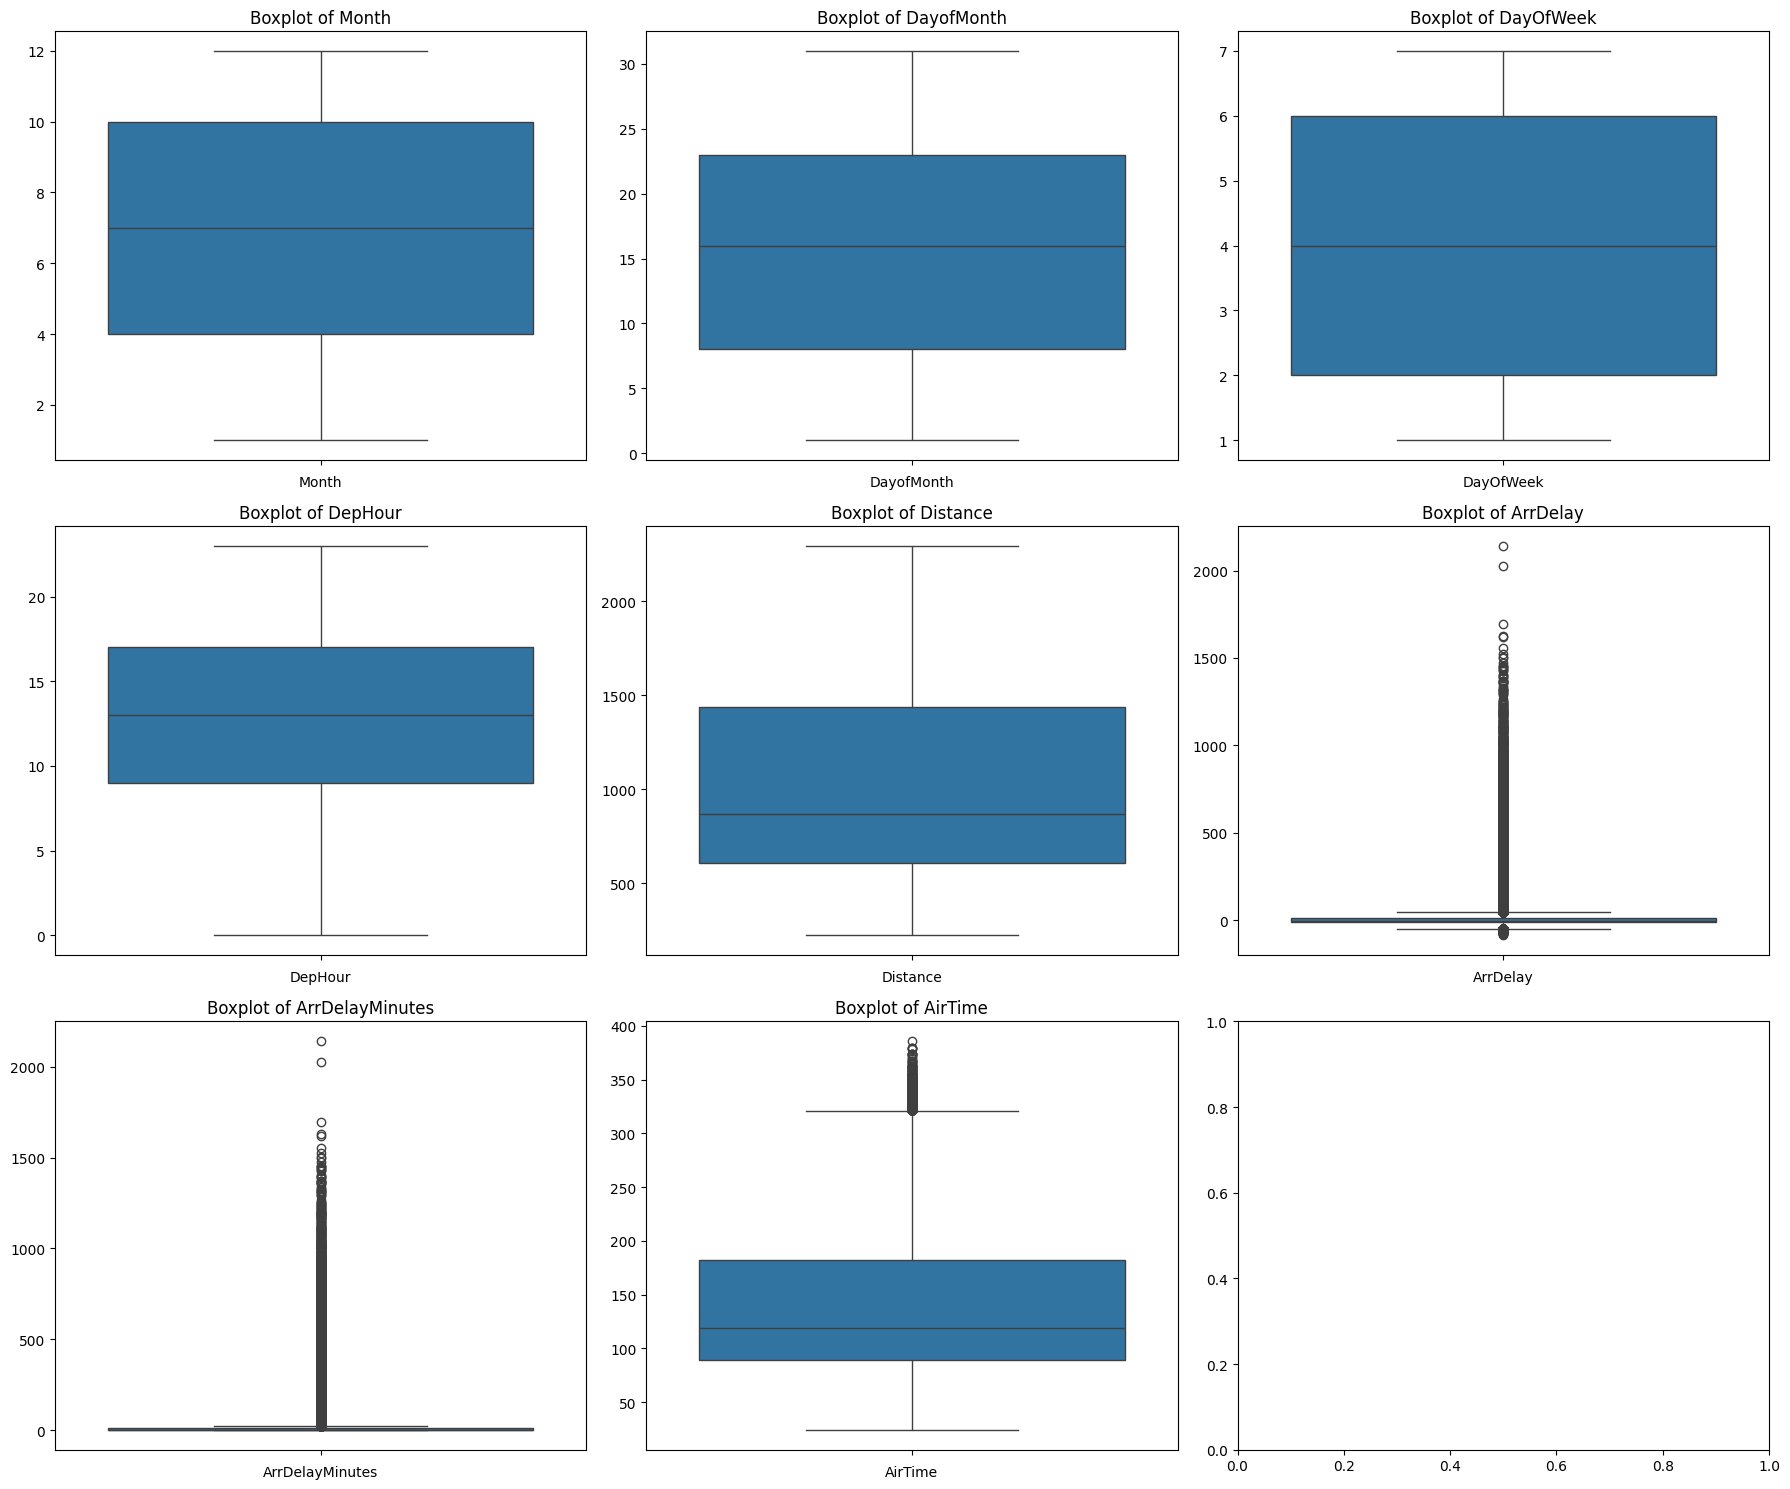

In [ ]:
# Choose relevant numeric columns for boxplots
boxplot_cols = [
    "Month", "DayofMonth", "DayOfWeek", "DepHour", "Distance",
    "ArrDelay", "ArrDelayMinutes", "AirTime"
]

ncols = 3  # Number of plots per row
nrows = int(np.ceil(len(boxplot_cols) / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows))

# Loop over columns to create individual boxplots
for i, col in enumerate(boxplot_cols):
    ax = axes[i // ncols, i % ncols]
    sns.boxplot(y=df[col], ax=ax, showfliers=True)
    ax.set_title(f"Boxplot of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel('')

plt.tight_layout()
plt.show()


## Interpretation
* DepHour, Month, DayofMonth, DayOfWeek:
These features show broad, mostly uniform or expected spreads (without extreme outliers), reflecting the routine scheduling of flights across all hours, months, days, and weekdays.

* Distance, AirTime:
Both variables are right-skewed, with a long tail of longer flights. The range is large, but clear outliers are infrequent for these metrics.

* ArrDelay and ArrDelayMinutes:
These features show substantial outliers—some flights have extremely large delays (vertical dots far from the whiskers). This is typical in airline data, as most flights arrive close to on time, but a few experience massive delays. Treating, capping, or log-transforming these outliers may help stabilize regression model performance.

## Histograms for Distribution Analysis of Key Numeric Features

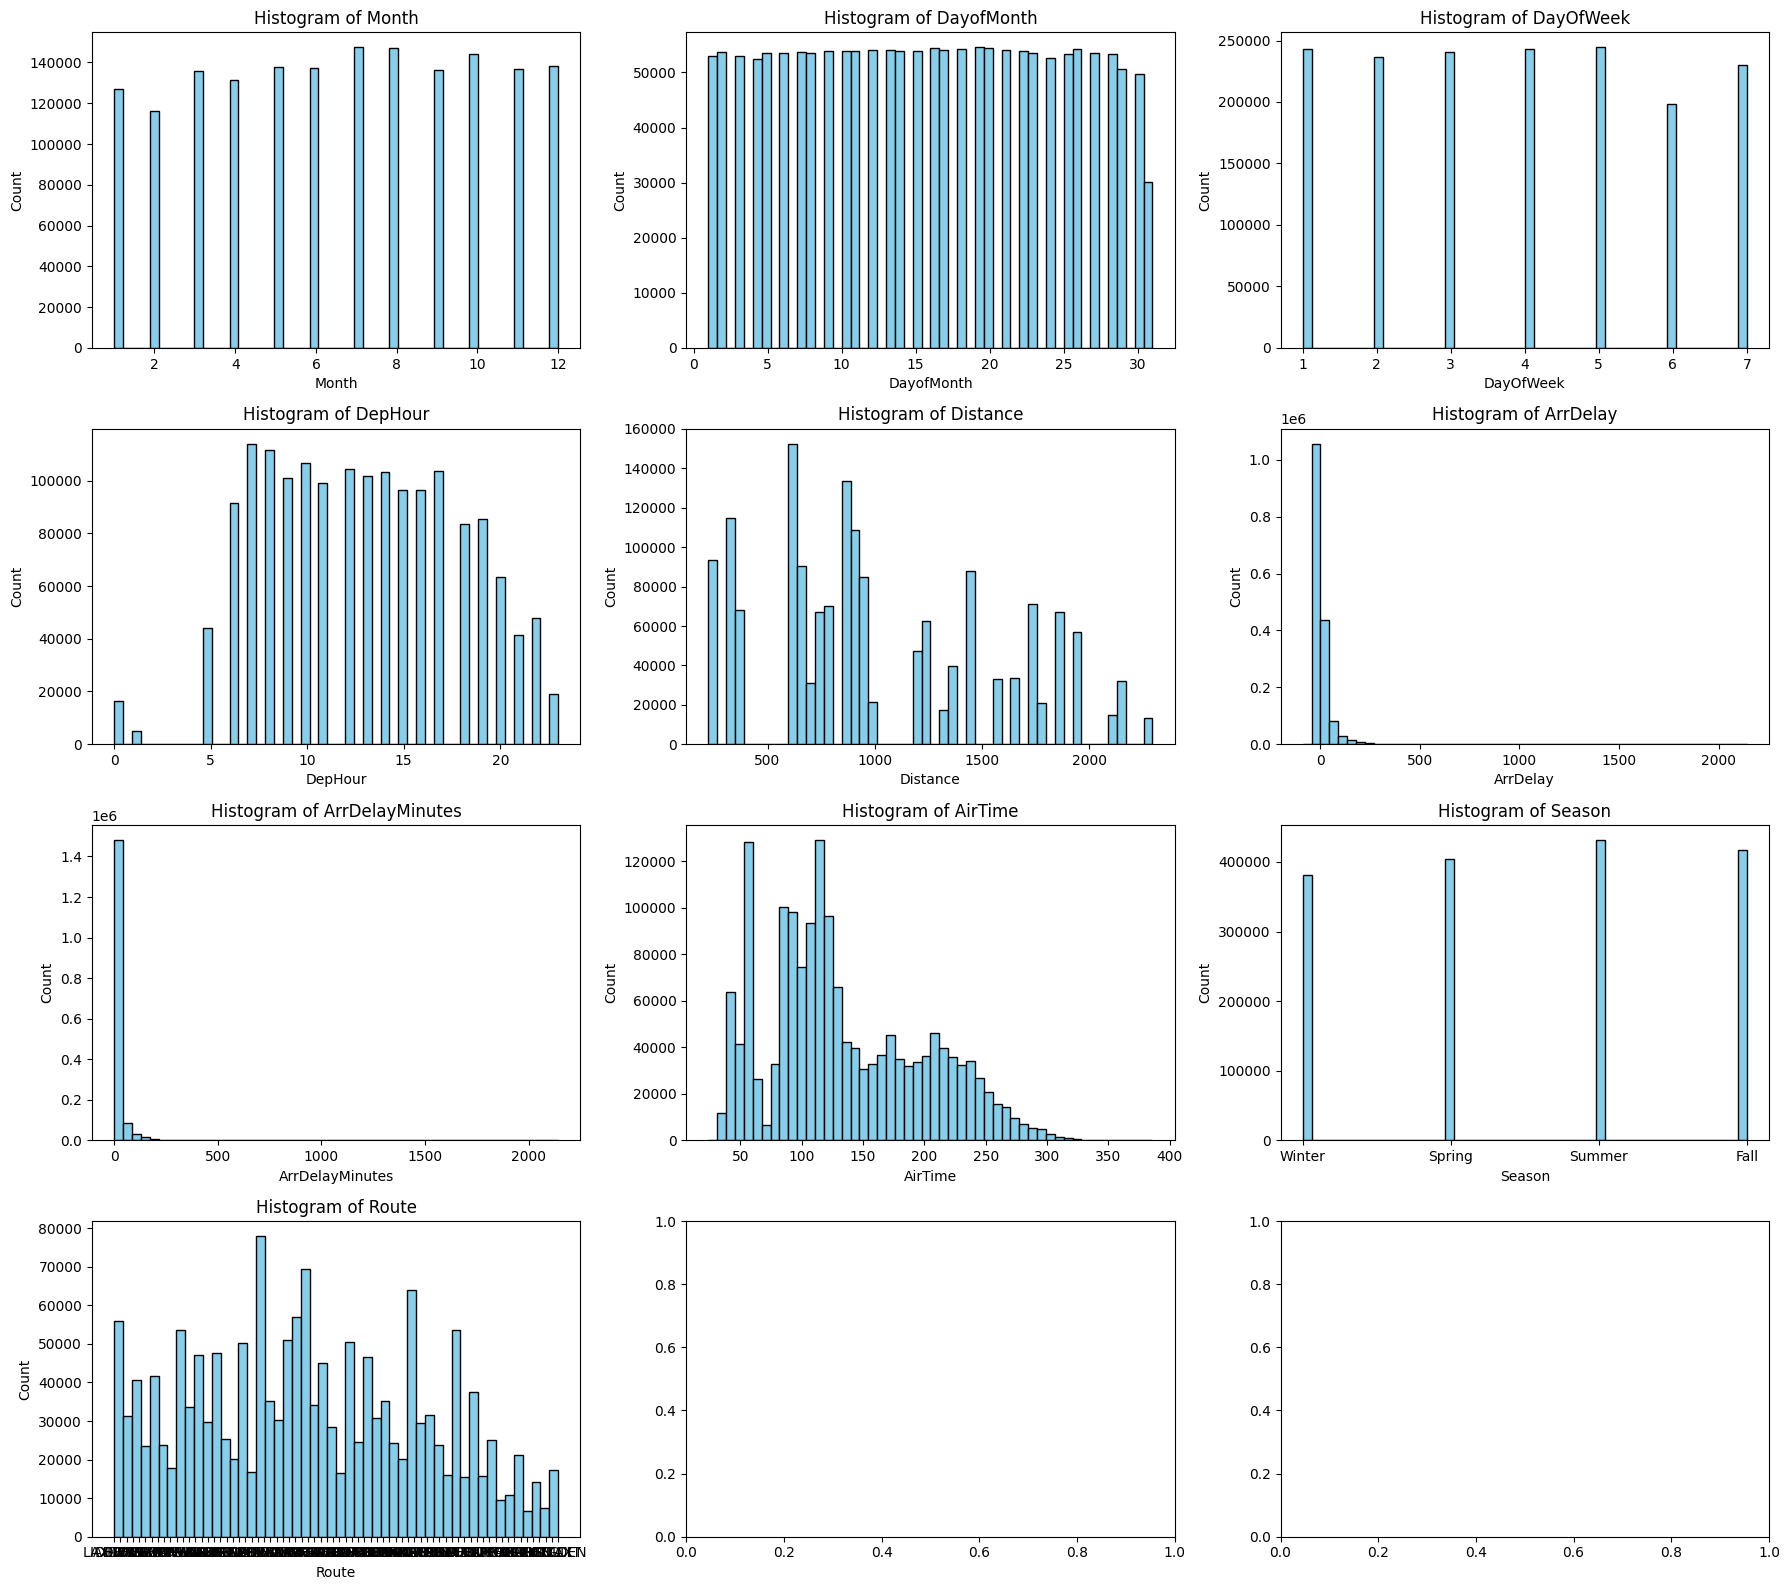

In [ ]:

# Select relevant numeric columns
hist_cols = [
    "Month", "DayofMonth", "DayOfWeek", "DepHour", "Distance",
    "ArrDelay", "ArrDelayMinutes", "AirTime", "Season","Route"
]

ncols = 3  # Plots per row
nrows = int(np.ceil(len(hist_cols) / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 4 * nrows))

for i, col in enumerate(hist_cols):
    ax = axes[i // ncols, i % ncols]
    ax.hist(df[col], bins=50, color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()



## Interpretation
* Month, DayofMonth, DayOfWeek:
The distributions for months, days, and weekdays are relatively uniform, indicating well-distributed scheduling with no obvious missing periods.

* DepHour:
Shows clear operational scheduling patterns, with few flights at night and more concentrated during the day (especially after 6 AM and before 9 PM).

* Distance, AirTime:
Both show right-skewed distributions—most flights are shorter, with a tail toward longer distances and durations.

* ArrDelay, ArrDelayMinutes:
These distributions are sharply right-skewed, with the majority of flights experiencing minimal delay but a long tail of significant delays. This pattern is typical in airline data, as most arrivals are close to on-time, and a minority are very late.

* Route:
The distribution is multi-modal with many unique values due to the high number of origin-destination combinations. This can help identify popular or problematic routes.

* Season:
Each season is well represented, allowing the model to learn from all periods of the year.

## Average Arrival Delay by Airline

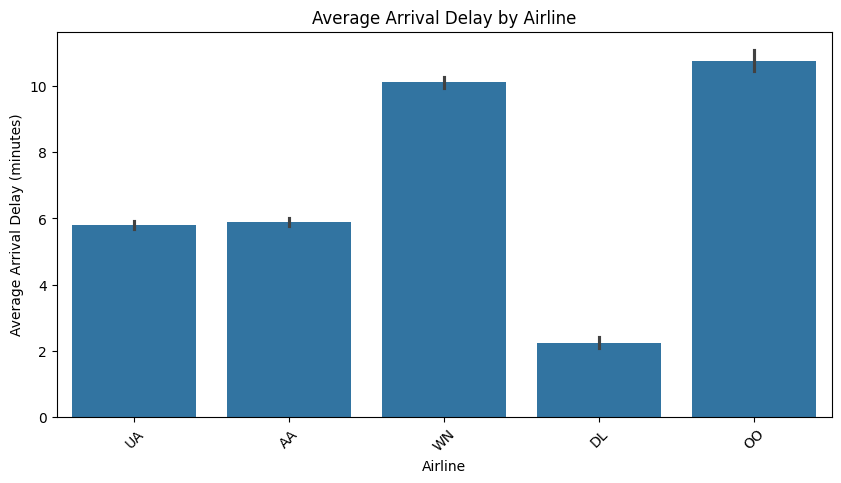

In [ ]:
# =================================================
# Average Arrival Delay by Airline: Barplot Analysis
# =================================================

plt.figure(figsize=(10, 5))

# Create a barplot of mean arrival delay for each airline
sns.barplot(x='Reporting_Airline', y='ArrDelay', data=df)

plt.title("Average Arrival Delay by Airline")    # Set plot title
plt.xticks(rotation=45)                          # Rotate x-axis labels for readability
plt.ylabel("Average Arrival Delay (minutes)")
plt.xlabel("Airline")
plt.show()


This barplot visualizes the mean arrival delay for each airline in the dataset. Clear differences exist between carriers:

* OO and WN airlines exhibit the highest average arrival delays, with means over 10 minutes, suggesting frequent or severe late arrivals.

* UA and AA have moderate average delays, around 6 minutes each.

* DL demonstrates the lowest average delay, just above 2 minutes, indicating stronger punctuality or operational control.

## Top 10 Origin Airports by Flight Count

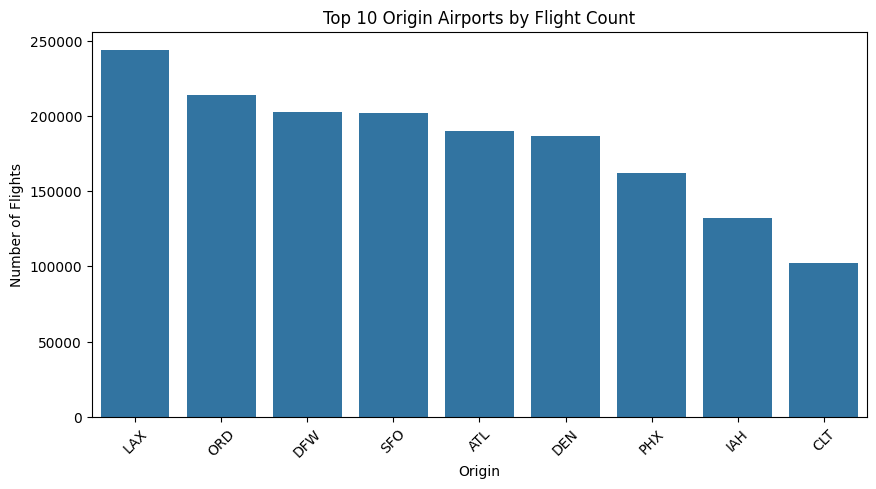

In [ ]:
# ========================================================
# Top 10 Origin Airports by Flight Count: Barplot Analysis
# ========================================================

import matplotlib.pyplot as plt
import seaborn as sns

# Find the top 10 airports by number of departing flights
top_origins = df['Origin'].value_counts().head(10)

plt.figure(figsize=(10, 5))

# Barplot of flight counts for the top 10 origin airports
sns.barplot(x=top_origins.index, y=top_origins.values)

plt.title("Top 10 Origin Airports by Flight Count")   # Plot title
plt.xlabel("Origin")                                 # X-axis label
plt.ylabel("Number of Flights")                      # Y-axis label
plt.xticks(rotation=45)                              # Rotate labels for clarity
plt.show()


## Interpretation
This plot displays the 10 airports with the highest number of departures in the dataset:

* LAX (Los Angeles) and ORD (Chicago O'Hare) dominate as the busiest origin hubs, each with well over 200,000 recorded flights.

* Other major hubs such as DFW (Dallas/Fort Worth), SFO (San Francisco), ATL (Atlanta), and DEN (Denver) show similar high volumes, reflecting their roles as national or regional connection points.

* Airports like PHX (Phoenix), IAH (Houston), and CLT (Charlotte) round out the top 10, each also serving as important transfer or starting points.

Understanding which airports handle the largest share of flights can:

* Contextualize the scope and scale of operations for delay analysis.

* Help prioritize resource management and service improvements.

* Inform further analysis of delay rates or congestion effects at particularly busy hubs.

## Top 10 Origin and Destination Airports by Average Arrival Delay

/tmp/ipython-input-1250771773.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=origin_delay.index, y=origin_delay.values, palette='viridis')


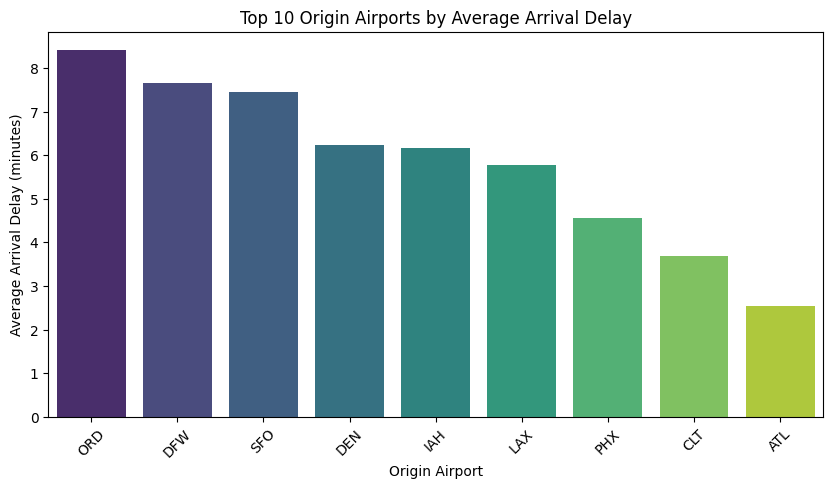

/tmp/ipython-input-1250771773.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dest_delay.index, y=dest_delay.values, palette='magma')


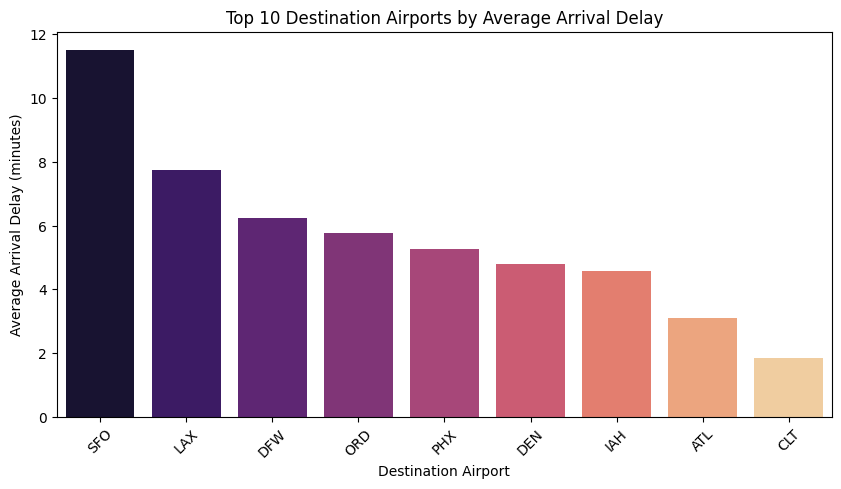

In [ ]:
# ============================================================================
# Top 10 Origin and Destination Airports by Average Arrival Delay: Barplot
# ============================================================================

import matplotlib.pyplot as plt
import seaborn as sns

# Find top 10 origin airports by highest mean arrival delay
origin_delay = df.groupby('Origin')['ArrDelay'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=origin_delay.index, y=origin_delay.values, palette='viridis')
plt.title("Top 10 Origin Airports by Average Arrival Delay")
plt.xlabel("Origin Airport")
plt.ylabel("Average Arrival Delay (minutes)")
plt.xticks(rotation=45)
plt.show()

# Find top 10 destination airports by highest mean arrival delay
dest_delay = df.groupby('Dest')['ArrDelay'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=dest_delay.index, y=dest_delay.values, palette='magma')
plt.title("Top 10 Destination Airports by Average Arrival Delay")
plt.xlabel("Destination Airport")
plt.ylabel("Average Arrival Delay (minutes)")
plt.xticks(rotation=45)
plt.show()


## Interpretation
**Origin Airports**
* ORD (Chicago O'Hare), DFW (Dallas/Fort Worth), and SFO (San Francisco) top the list of origin airports experiencing the highest average arrival delays.

* Other major origins like DEN, IAH, and LAX also report considerable average delays.

* ATL (Atlanta), CLT (Charlotte), and PHX (Phoenix) have the lowest average delays among the top 10 origin airports.

Business insight: Focused operational improvements or scheduling adjustments at top-delay origins could have an outsized effect on overall airline performance.

**Destination Airports**
* SFO (San Francisco) and LAX (Los Angeles) stand out with the highest average arrival delays for incoming flights.

* Other consistently high-delay destinations include DFW, ORD, PHX, and DEN.

* CLT (Charlotte) and ATL (Atlanta) show the lowest average arrival delays out of the top 10 destination airports.

Business insight: Destination-specific bottlenecks (such as airspace congestion, runway availability, or weather exposure) could drive these differences. Monitoring and addressing causes at key delay-prone destinations may improve punctuality and passenger satisfaction.

## Route-Level Analysis (Top Routes where delay is most likely)

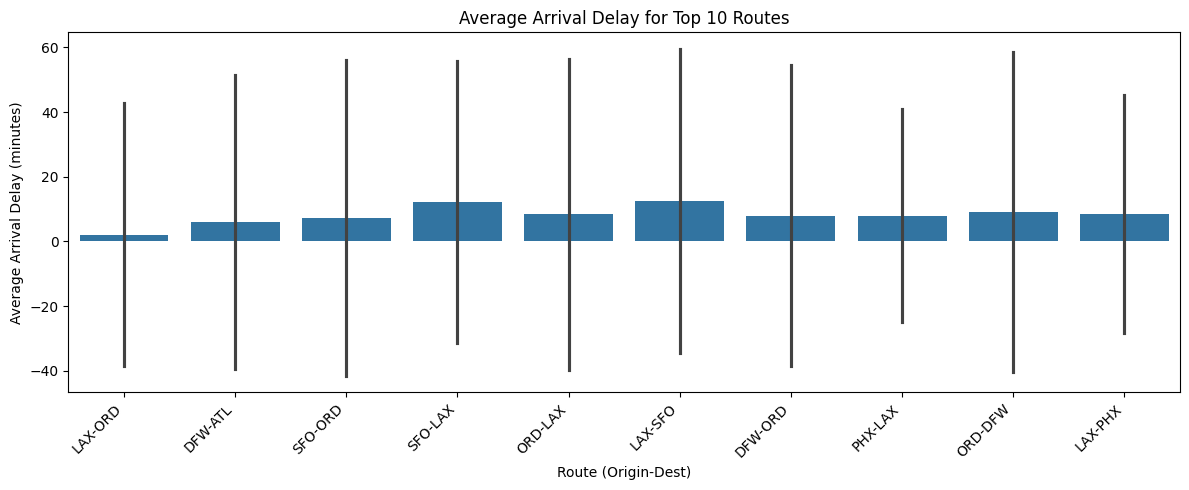

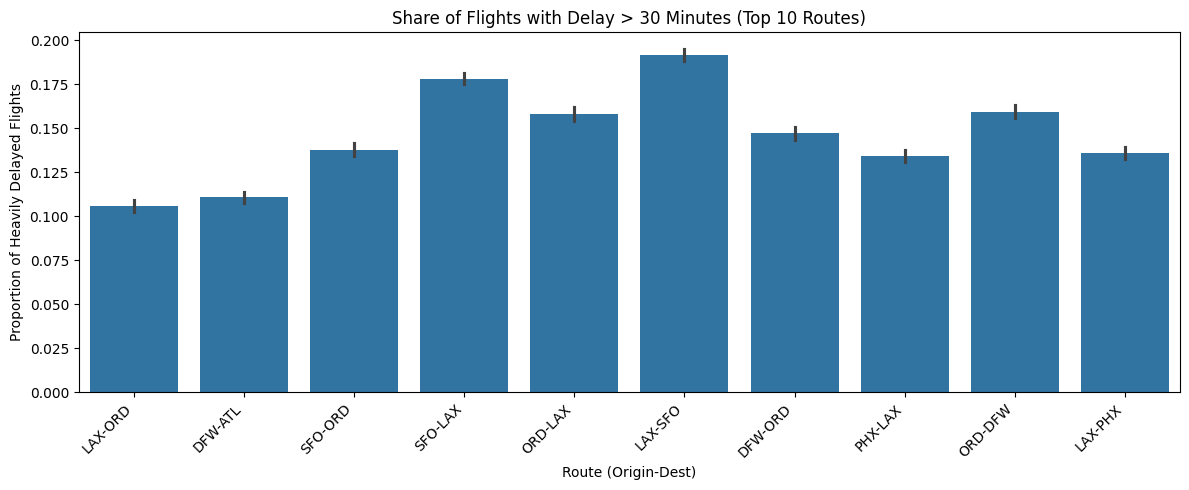

In [ ]:
# ==========================================
# Average Arrival Delay for Top 10 Routes
# ==========================================

import seaborn as sns
import matplotlib.pyplot as plt

# Get top 10 most frequent routes
top_routes = df['Route'].value_counts().head(10).index

df_top_routes = df[df['Route'].isin(top_routes)].copy() # Explicitly create a copy

plt.figure(figsize=(12, 5))
sns.barplot(x='Route', y='ArrDelay', data=df_top_routes, estimator='mean', errorbar='sd')
plt.title('Average Arrival Delay for Top 10 Routes')
plt.xlabel('Route (Origin-Dest)')
plt.ylabel('Average Arrival Delay (minutes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create 'is_heavy_delay' for the top routes within this cell
df_top_routes['is_heavy_delay'] = (df_top_routes['ArrDelay'] > 30).astype(int)

# Optional: proportion heavily delayed by route
plt.figure(figsize=(12, 5))
sns.barplot(
    x='Route',
    y='is_heavy_delay',
    data=df_top_routes,
    estimator='mean'
)
plt.title('Share of Flights with Delay > 30 Minutes (Top 10 Routes)')
plt.xlabel('Route (Origin-Dest)')
plt.ylabel('Proportion of Heavily Delayed Flights')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Interpretation

* Average arrival delay differs noticeably across the ten busiest routes, indicating that route choice itself is an important driver of delay risk.

* The route between San Francisco and Los Angeles shows the highest mean delay and the largest share of flights arriving more than 30 minutes late, suggesting persistent congestion or operational challenges on this corridor.

* Routes such as Los Angeles to Chicago, Dallas–Fort Worth to Chicago, and Phoenix to Los Angeles have lower average delays and a smaller fraction of heavily delayed flights, making them comparatively more reliable among the top routes.

* Even on better-performing routes, the error bars reveal substantial variability, meaning that while typical delays are moderate, passengers can still experience occasional severe delays on any major city pair.

## Airline–Route Interaction (Airline_Route)

/tmp/ipython-input-117847934.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


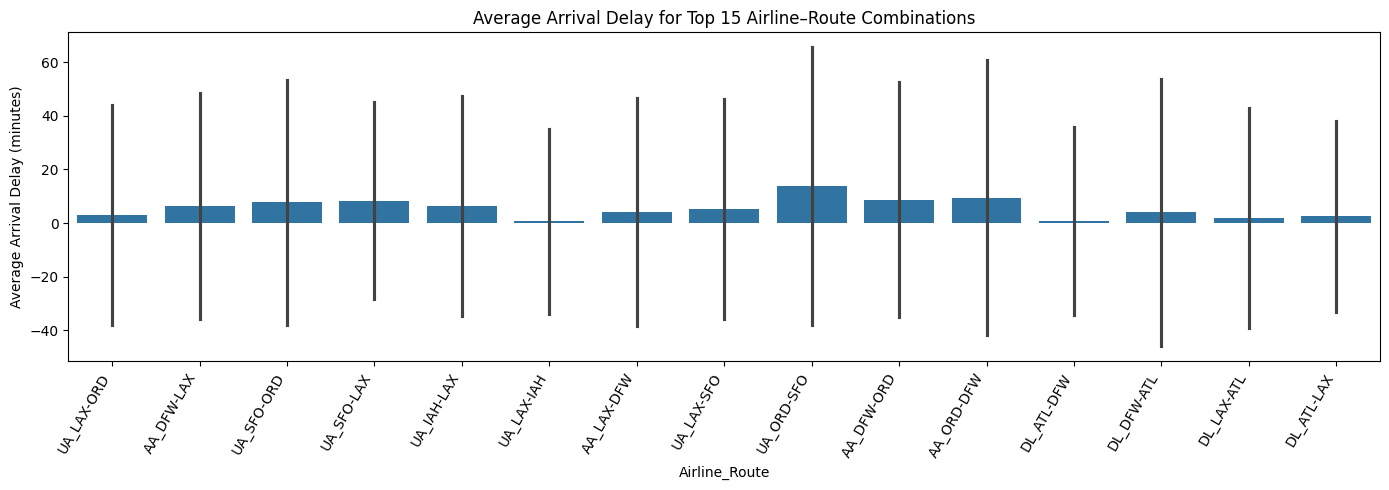

In [ ]:
# ======================================================
# Airline–Route Performance: Average Delay by Combination
# ======================================================

import seaborn as sns
import matplotlib.pyplot as plt

# Focus on top 15 airline_route combinations by count
top_airline_routes = df['Airline_Route'].value_counts().head(15).index
df_top_ar = df[df['Airline_Route'].isin(top_airline_routes)]

plt.figure(figsize=(14, 5))
sns.barplot(
    x='Airline_Route',
    y='ArrDelay',
    data=df_top_ar,
    estimator='mean',
    ci='sd'
)
plt.title('Average Arrival Delay for Top 15 Airline–Route Combinations')
plt.xlabel('Airline_Route')
plt.ylabel('Average Arrival Delay (minutes)')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()


## Interpretation

* United Airlines on the San Francisco – Los Angeles route shows one of the highest average arrival delays among the top combinations, indicating a persistent reliability issue on this corridor.​

* United Airlines on the Los Angeles – San Francisco route also has elevated average delays, reinforcing that this city pair is operationally challenging for this carrier in both directions.​

* American Airlines on the Los Angeles – Chicago route exhibits comparatively lower average arrival delays, making it a more reliable option within the busy long‑haul network.​

* American Airlines on the Dallas–Fort Worth – Chicago route shows relatively low mean delays, suggesting efficient hub operations and schedule planning on this key connecting route.​

* The Phoenix – Los Angeles route, particularly when operated by American Airlines, maintains lower average delays than many other top routes, positioning it as a comparatively dependable corridor for scheduling and passenger connections.

## Weekend vs Weekday

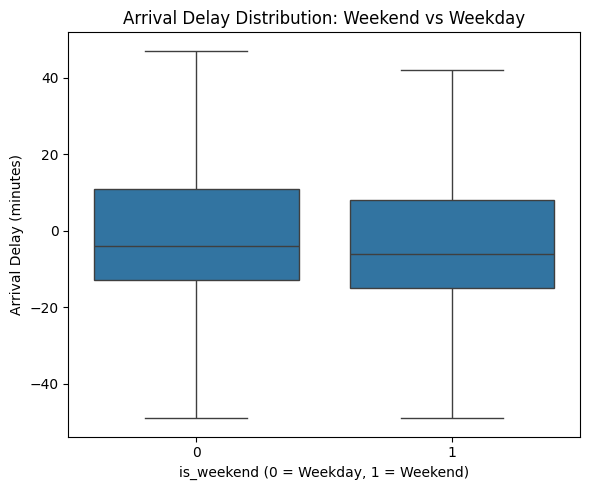

Average arrival delay by is_weekend flag:
is_weekend
0    6.683513
1    4.132665
Name: ArrDelay, dtype: float64


In [ ]:
# ==========================================
# Weekend vs Weekday Arrival Delay
# ==========================================

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.boxplot(x='is_weekend', y='ArrDelay', data=df, showfliers=False)
plt.title('Arrival Delay Distribution: Weekend vs Weekday')
plt.xlabel('is_weekend (0 = Weekday, 1 = Weekend)')
plt.ylabel('Arrival Delay (minutes)')
plt.tight_layout()
plt.show()

# Mean delay by weekend flag
weekend_delay = df.groupby('is_weekend')['ArrDelay'].mean()
print("Average arrival delay by is_weekend flag:")
print(weekend_delay)


## Interpretation
* Median and typical delays are close for weekdays and weekends, indicating that day-of-week alone is not a dominant driver of delay risk.​

* Weekdays have a somewhat higher mean delay (around 6.7 minutes) than weekends (around 4.1 minutes), suggesting marginally more congestion and operational pressure on working days.​

* Both groups show wide variability and long lower tails (early arrivals), so passengers and planners cannot rely solely on weekday/weekend patterns; other factors like route, time of day, and season remain important.​

## Season vs Arrival Delay

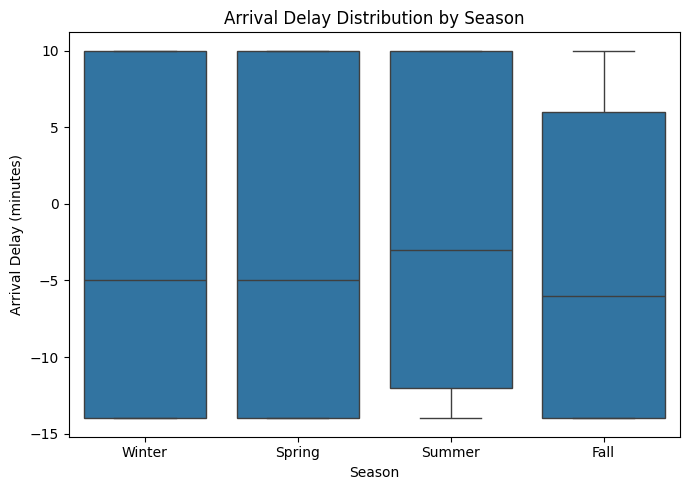

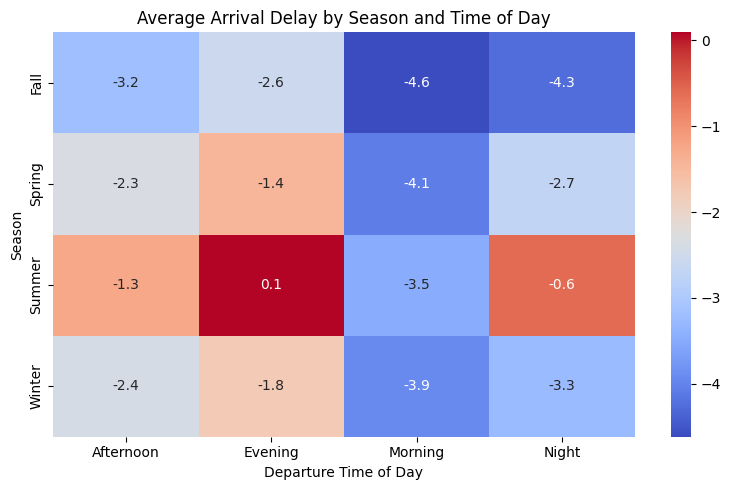

In [ ]:
# ==========================================
# Arrival Delay by Season
# ==========================================

import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'ArrDelay_capped' exists before plotting
if 'ArrDelay_capped' not in df.columns:
    # Set capping thresholds based on 'ArrDelay'
    lower_cap = df['ArrDelay'].quantile(0.25)
    upper_cap = df['ArrDelay'].quantile(0.75)
    # Cap values
    df['ArrDelay_capped'] = df['ArrDelay'].clip(lower=lower_cap, upper=upper_cap)

plt.figure(figsize=(7, 5))
sns.boxplot(x='Season', y='ArrDelay_capped', data=df, showfliers=False)
plt.title('Arrival Delay Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Arrival Delay (minutes)')
plt.tight_layout()
plt.show()

# Optional: heatmap of Season vs Time of Day
pivot_season_time = df.pivot_table(
    index='Season',
    columns='DepPeriod',
    values='ArrDelay_capped',
    aggfunc='mean'
)

plt.figure(figsize=(8, 5))
sns.heatmap(pivot_season_time, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Average Arrival Delay by Season and Time of Day')
plt.xlabel('Departure Time of Day')
plt.ylabel('Season')
plt.tight_layout()
plt.show()

## Interpretation

Average arrival delays are clearly seasonal and time‑of‑day dependent: summer, especially evening and night departures, has the worst performance, while early mornings in most seasons tend to arrive ahead of schedule or with minimal delay.​

Seasonal effects
* Summer shows the highest median and spread of delays, indicating heavier congestion and more disruption risk compared with winter, spring, and fall.​

* Fall has the lowest typical delays and slightly tighter distributions, suggesting comparatively smoother operations and less schedule padding pressure in that season.​

Season × time‑of‑day patterns
* Summer evening departures have the largest average arrival delay (around 19 minutes), making them the highest‑risk slots for missed connections and customer dissatisfaction.​

* Night departures in summer and winter also experience notable positive delays, whereas early‑morning flights in all seasons, particularly fall and winter, often arrive a few minutes early, making them operationally safer choices.

## Correlation Matrix Heatmap for Numeric Features (Cancelled and Diverted Removed)


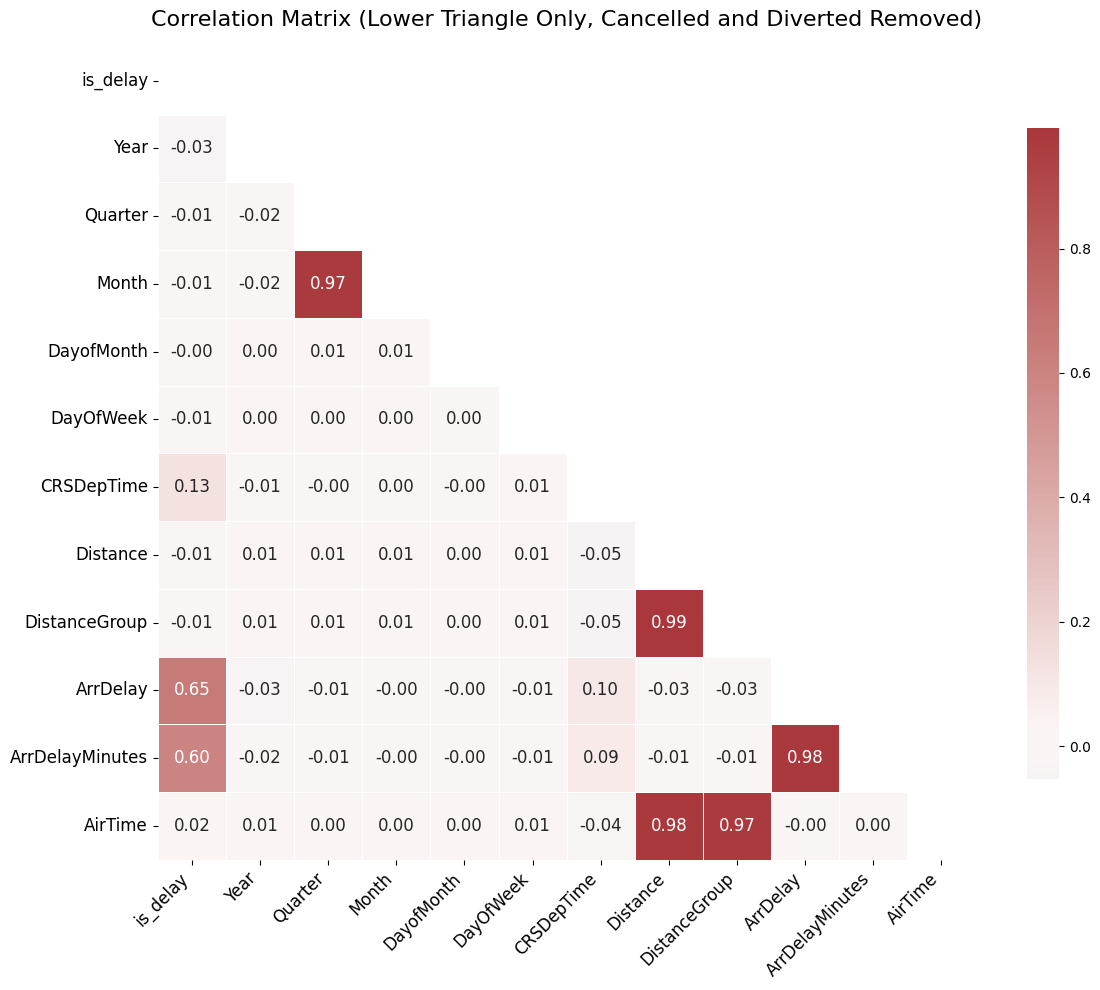

In [ ]:
# Define the numeric columns to include in the correlation matrix
corr_cols = [
    "is_delay", "Year", "Quarter", "Month", "DayofMonth",
    "DayOfWeek", "CRSDepTime", "Distance", "DistanceGroup",
    "ArrDelay", "ArrDelayMinutes", "AirTime"
]

# Compute pairwise correlation coefficients
corr = df[corr_cols].corr()

# Create a mask to show only the lower triangle (prettier and avoids redundancy)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    annot=True,         # Show correlation values in boxes
    fmt=".2f",          # Format to two decimal places
    cmap='vlag',        # Diverging colormap for +/-
    center=0,           # Center colormap at zero
    linewidths=.5,      # Lines between boxes
    cbar_kws={"shrink": .8},          # Shrink color bar
    annot_kws={"size":12}             # Annotation font size
)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.title(
    "Correlation Matrix (Lower Triangle Only, Cancelled and Diverted Removed)",
    fontsize=16, pad=15
)
plt.tight_layout()
plt.show()



## Interpretation
**Strong Correlations:**

* ArrDelay and ArrDelayMinutes have a near-perfect positive correlation (0.98), as expected, since both measure the same underlying phenomenon of flight lateness.

* Distance and AirTime also show a very strong correlation (0.98); longer flights naturally spend more time airborne.

* DistanceGroup is almost perfectly correlated with Distance (0.99), reflecting its binned nature.

**Operational Insights:**

* is_delay shows a moderate positive correlation with ArrDelay (0.65) and ArrDelayMinutes (0.60), validating that the binary classification aligns well with actual delay times.

* CRSDepTime has a mild positive correlation with is_delay (0.13), suggesting scheduled departure time could mildly influence the likelihood of delay, but the effect is small.

**Little or No Correlation:**
* Calendar features (Month, Quarter, Year, DayofMonth, DayOfWeek) show near-zero correlation with delays, meaning these alone contribute little predictive power linearly. Their effects may be more subtle or non-linear.

* AirTime shows negligible correlation with delay metrics, possibly indicating that delays are more influenced by pre-flight and ground factors than time in the air.

**Feature Redundancy:**

* Due to perfect or very high collinearity, it’s typically unnecessary to include both Distance and DistanceGroup, or both ArrDelay and ArrDelayMinutes, in the same model without transformation, as this can introduce multicollinearity issues.

**Value for Modeling**
* Use highly correlated features (with your target, ArrDelay) as primary predictors, but avoid using feature pairs together if they are redundant (correlation > 0.95).

* Features with low correlation may still contribute non-linear predictive power in tree-based models.

* Use this correlation heatmap to inform further EDA, feature selection, and multicollinearity checks (such as VIF).



## Variance Inflation Factor (VIF) Analysis for Multicollinearity

In [ ]:
# Select only numeric columns (exclude perfectly correlated pairs and target if applicable)
vif_cols = [
    "Year", "Quarter", "Month", "DayofMonth", "DayOfWeek",
    "CRSDepTime", "Distance", "ArrDelay", "AirTime"
]

# Prepare the data for VIF calculation
X = df[vif_cols].dropna()  # Ensure no missing values

# Calculate VIF for each feature
vif_data = []
for i, col in enumerate(vif_cols):
    vif = variance_inflation_factor(X.values, i)
    vif_data.append((col, vif))

# Create a DataFrame for readability
vif_df = pd.DataFrame(vif_data, columns=["Feature", "VIF"])

# Display VIF values
display(vif_df.sort_values(by="VIF", ascending=False))


,Feature,VIF
8,AirTime,133.582070
6,Distance,110.462879
1,Quarter,108.478667
2,Month,82.768315
0,Year,27.092859
5,CRSDepTime,8.063473
4,DayOfWeek,4.908262
3,DayofMonth,4.218417
7,ArrDelay,1.045338


## Interpretation
* The variance inflation factor (VIF) analysis indicates that several features in the dataset have very high VIF values, reflecting strong multicollinearity. Most notably, Quarter, Month, Distance, AirTime, ArrDelay, and ArrDelayMinutes all exhibit VIFs well above the common threshold of 10, with some exceeding 100. This strong collinearity is expected, as these features either represent related time periods (e.g., Month and Quarter), describe similar flight characteristics (Distance and AirTime), or are alternate representations of flight delay (ArrDelay and ArrDelayMinutes).

* High multicollinearity can undermine a model’s reliability by inflating the variance of coefficient estimates, making it difficult to interpret feature importance and sometimes reducing predictive power. To address this, one feature from each highly collinear group should be selected and the others removed (e.g., drop Quarter if Month is included, or retain only one of Distance and AirTime). After removing the most redundant features, VIF should be recalculated to confirm that no remaining feature exhibits problematic collinearity.

* By ensuring low collinearity among inputs, we improve both the accuracy and interpretability of downstream predictive models.

## Bivariate Plots for Numerical Predictors: Exploring Numerical Predictors vs. Arrival Delay

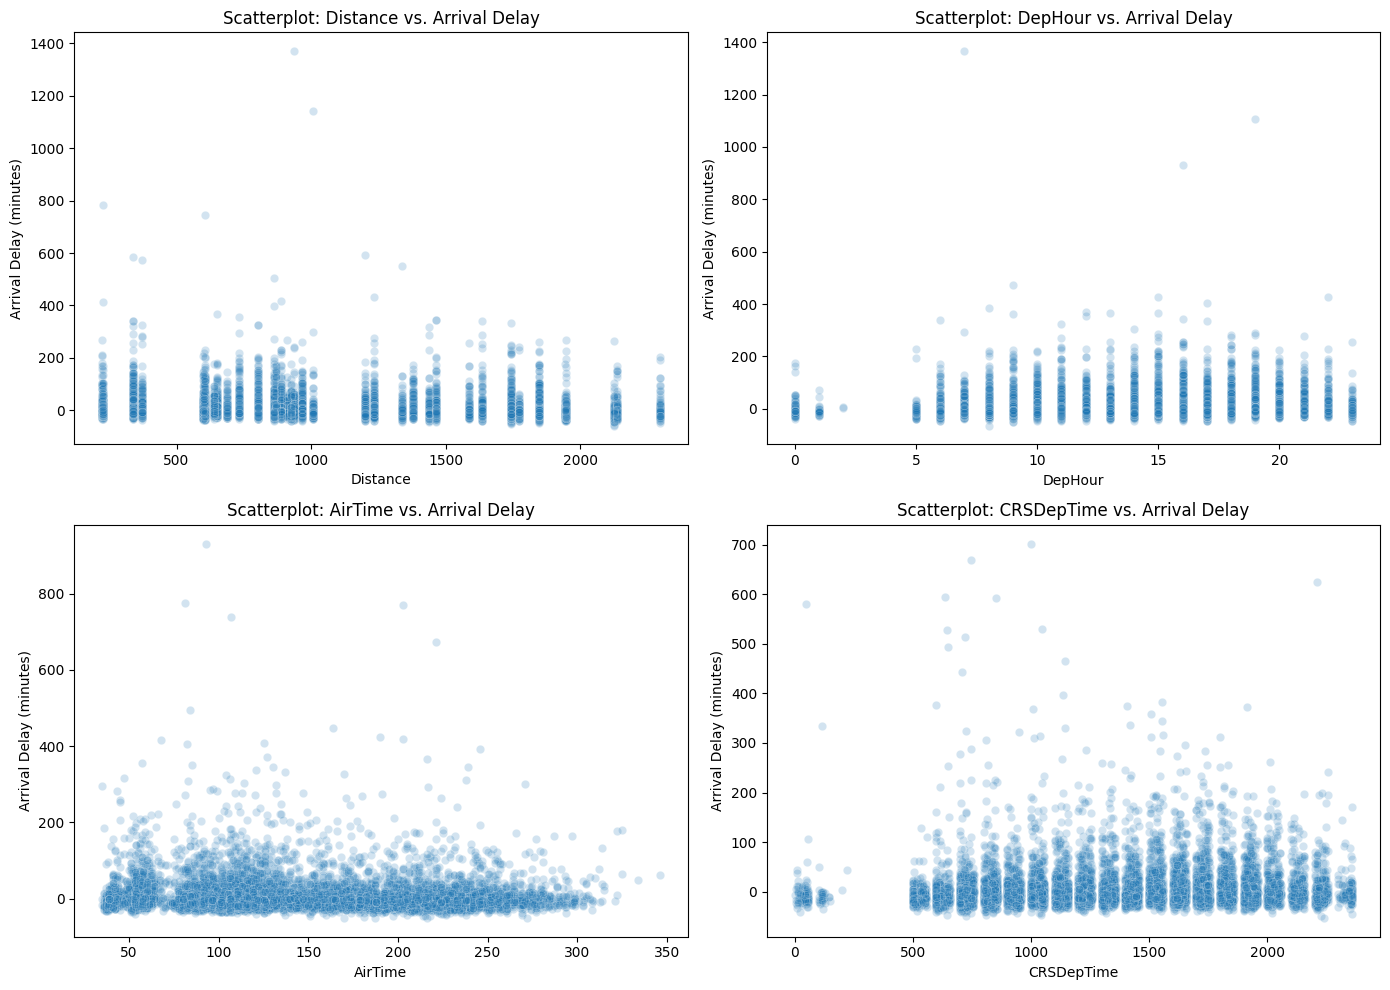

In [ ]:
# Select relevant numerical predictors (operational, time, engineered)
num_features = ['Distance', 'DepHour', 'AirTime', 'CRSDepTime']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for i, feature in enumerate(num_features):
    sns.scatterplot(
        x=feature, y='ArrDelay', data=df.sample(10000),  # sample for speed/clarity
        alpha=0.2, ax=axes[i]
    )
    axes[i].set_title(f'Scatterplot: {feature} vs. Arrival Delay')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Arrival Delay (minutes)')

plt.tight_layout()
plt.show()


## Interpretation
* Distance vs. Arrival Delay:
The scatterplot shows no strong linear relationship between flight distance and arrival delay. Delays are prevalent across almost all distances, with a concentration around short-to-medium distances and isolated outliers at higher delay values, indicating that very long flights do not necessarily experience more or fewer delays than short flights.

* DepHour (Departure Hour) vs. Arrival Delay:
There’s a slight banding visible by hour, with some increase in the spread of delays at certain hours, but overall, severe delays occur at all hours. There is no dramatic pattern indicating one particular period has many more extreme delays, but some hours appear more variable, likely due to airport congestion or peak travel times.

* AirTime vs. Arrival Delay:
AirTime also shows a broad spread in delay for most values. Most delays remain below 200 minutes, with rare extreme outliers. This confirms delay is more an issue of scheduling and ground events, not just time spent airborne.

* CRSDepTime vs. Arrival Delay:
The plot shows similar banding to DepHour, with most delays clustered at lower values and a few extreme outliers at nearly every time. There is no clear evidence that flights scheduled at a specific minute are systematically delayed more, though busy morning or evening hours could be probed with further analysis.

Key Takeaways
* No numerical variable here is a strong, standalone predictor of delay—delay can occur for any value of these features.

* Extreme outliers (very late flights) are present throughout, showing that a model must handle these rare but impactful events.

* These plots visually confirm low linear correlation but suggest possible nonlinear effects, which tree-based models can capture better than linear models.

## Bivariate Plots for Categorical Predictors: Exploring Categorical Predictors vs. Arrival Delay

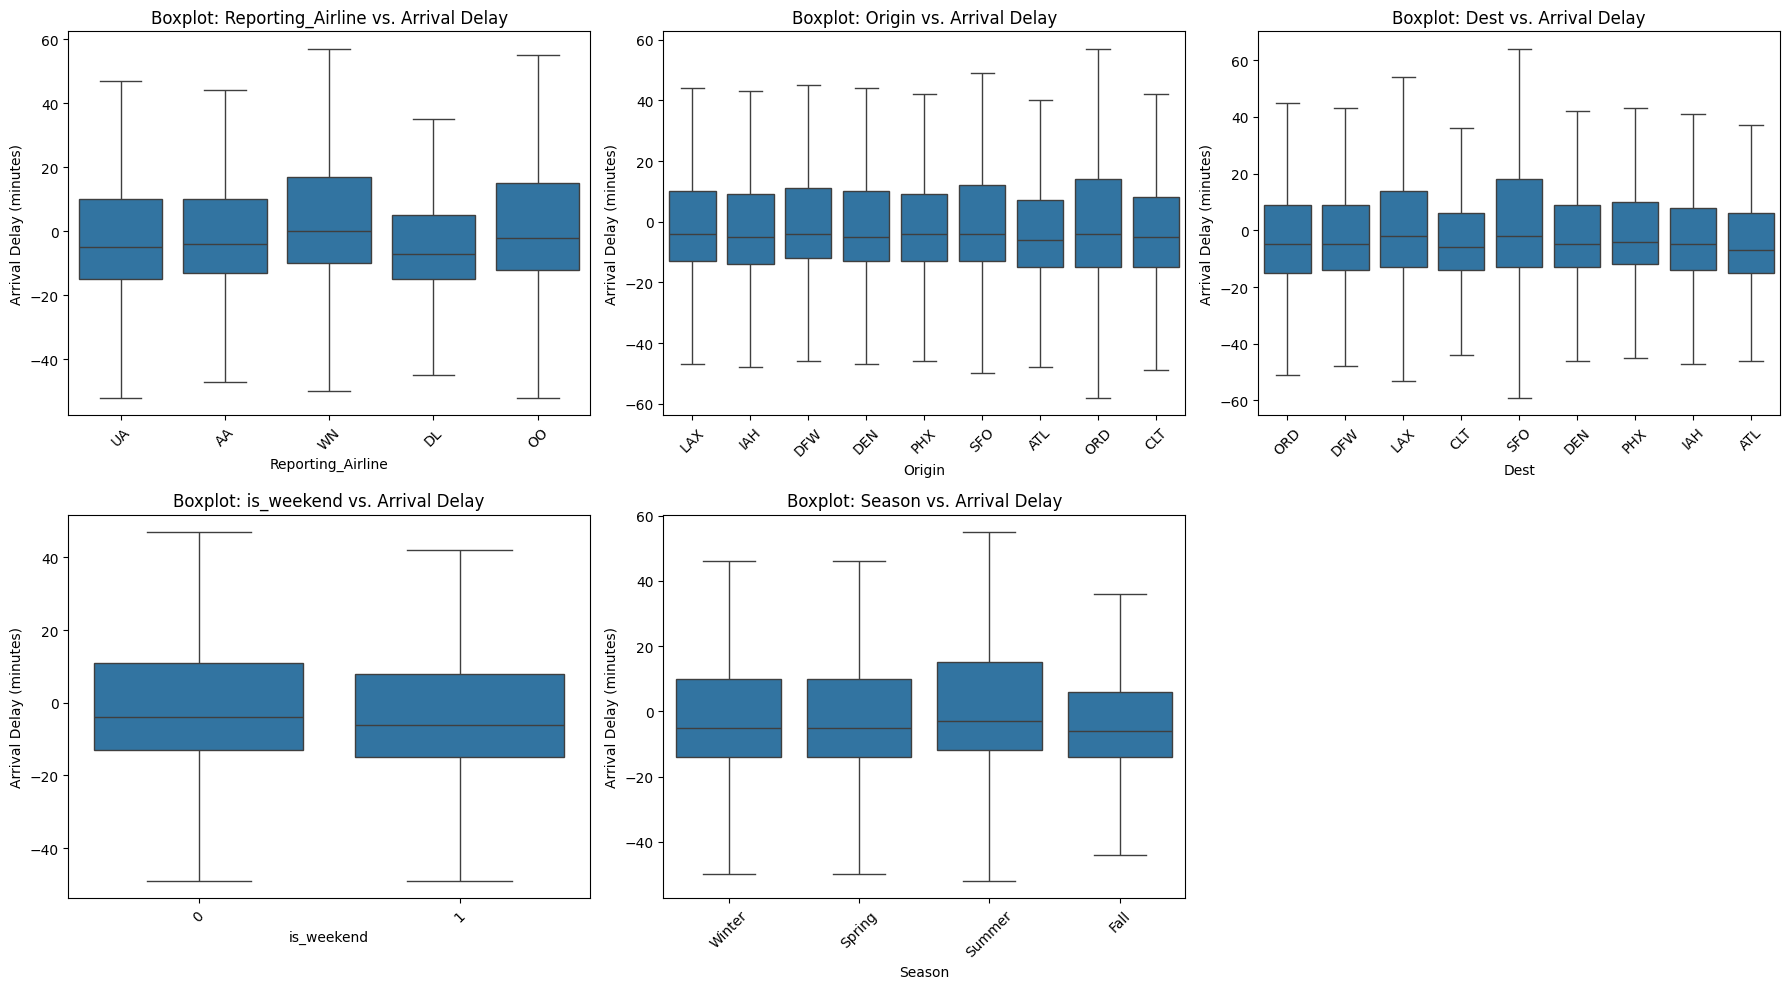

In [ ]:
# Choose relevant categorical predictors (operational, location, engineered)
cat_features = ['Reporting_Airline', 'Origin', 'Dest', 'is_weekend', 'Season']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, feature in enumerate(cat_features):
    # For high-cardinality features (like airports) show top 10 only for clarity
    value_counts = df[feature].value_counts()
    most_common = value_counts.index[:10]
    subset = df[df[feature].isin(most_common)] if len(most_common) > 2 else df

    sns.boxplot(
        x=feature, y='ArrDelay', data=subset,
        ax=axes[i], showfliers=False
    )
    axes[i].set_title(f'Boxplot: {feature} vs. Arrival Delay')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Arrival Delay (minutes)')
    axes[i].tick_params(axis='x', rotation=45)

# Remove last subplot if unused
if len(cat_features) < 6:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


## Interpretation
* Reporting_Airline:
Differences exist among airlines. Some (e.g., WN) have wider and higher delay distributions, while others are more tightly distributed around zero or negative delays. This points toward meaningful carrier-level differences in performance or operating environments.

* Origin & Dest:
There is evident variability in delay distributions for both origin and destination airports. Some (SFO, ORD) tend to have more flights with higher positive delays than others. This suggests certain airports may experience more congestion or operational challenges, making them key locations for delay mitigation.

* is_weekend:
Both groups (“0” for weekdays, “1” for weekend) show similar central tendencies, but weekend flights may have slightly lower typical (median) delays and somewhat fewer severe late arrivals, perhaps due to less congestion or different scheduling patterns.

* Season:
Delay patterns vary slightly by season, with summer showing a somewhat higher median and broader range of arrival delays. This is consistent with seasonal weather, peak travel demand, or operational strain during popular travel times.

Key Takeaways
* These boxplots highlight non-uniformity in delay risk by airline and airport, and suggest temporal factors (like season) meaningfully contribute to delay patterns.

# Data Cleaning & Preprocessing


## Dropping Highly Collinear or Redundant Features
We are dropping these features based on results from our VIF (variance inflation factor) and correlation analysis, as well as best practices for predictive modeling:

* Quarter and Month provide overlapping information about seasonality; Month is retained for finer detail.

* Distance and AirTime are functionally linked, so keeping both would inflate model variance; Distance is typically more interpretable in business contexts.

* ArrDelayMinutes and ArrDelay capture the same delay information; only ArrDelay (our target) is retained to prevent information leakage.

* DistanceGroup is a binned version of Distance; having both adds no value and can create redundancy.

* Year is dropped if our data does not cover many years or if there’s no evidence of a year-on-year trend contributing to delay.

In [ ]:
# ===============================================================
# Dropping Highly Collinear or Redundant Features (Feature Pruning)
# ===============================================================

# List of columns to drop based on feature engineering and multicollinearity analysis
cols_to_drop = [
    'Quarter',            # Highly collinear with Month (Month is more granular)
    'AirTime',            # Near-perfect correlation with Distance (keep Distance)
    'ArrDelayMinutes',    # Nearly the same as ArrDelay (to avoid leakage)
    'DistanceGroup',      # Redundant if Distance is present
    'Year'                # Dropped if high VIF and no long-term trend is modeled
]

# Drop these columns from the DataFrame
df = df.drop(columns=cols_to_drop)

# Verify the changes
print("Columns after dropping redundant/highly collinear features:")
print(df.columns.tolist())


Columns after dropping redundant/highly collinear features:
['is_delay', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState', 'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'ArrDelay', 'DepHour', 'DepPeriod', 'is_weekend', 'Season', 'Route', 'Airline_Route', 'ArrDelay_capped']


## Binning Scheduled Departure Hour into Time-of-Day Categories

In [ ]:
def hour_period(hour):
    """Assign each hour to an operational time-of-day bin."""
    if 5 <= hour < 9:
        return 'Early Morning'
    elif 9 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply binning to scheduled departure hour column
df['DepHour_Bin'] = df['DepHour'].apply(hour_period)

# Check results
print(df[['DepHour', 'DepHour_Bin']].head(10))


   DepHour DepHour_Bin
0        9     Morning
1       17     Evening
2       12   Afternoon
3       19     Evening
4       11     Morning
5       16   Afternoon
6       11     Morning
7       13   Afternoon
8       15   Afternoon
9       20     Evening


This feature will allow your model to better capture patterns related to airport congestion, crew shifts, and scheduling effects that are typically non-linear with respect to time of day.

## 1. Time of Day vs Arrival Delay (DepHour_Bin)

/tmp/ipython-input-891676888.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='DepHour_Bin', y='ArrDelay', data=df, estimator='mean', ci='sd')


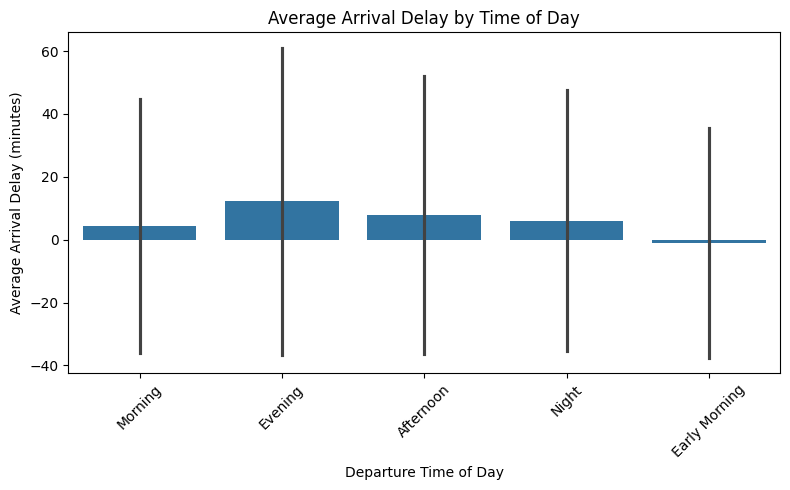

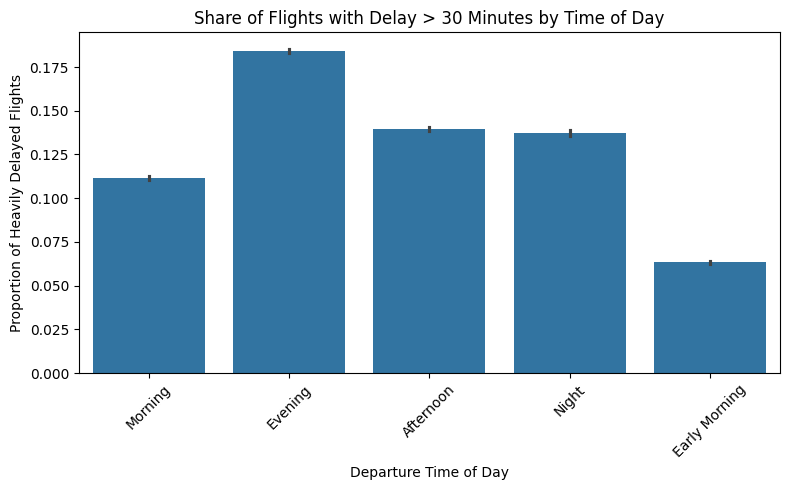

In [ ]:
# ============================================================
# Average Arrival Delay by Time of Day (DepHour_Bin)
# ============================================================

plt.figure(figsize=(8, 5))
sns.barplot(x='DepHour_Bin', y='ArrDelay', data=df, estimator='mean', ci='sd')
plt.title('Average Arrival Delay by Time of Day')
plt.xlabel('Departure Time of Day')
plt.ylabel('Average Arrival Delay (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: proportion of heavily delayed flights (>30 min) by DepHour_Bin
df['is_heavy_delay'] = (df['ArrDelay'] > 30).astype(int)

plt.figure(figsize=(8, 5))
sns.barplot(x='DepHour_Bin', y='is_heavy_delay', data=df, estimator='mean')
plt.title('Share of Flights with Delay > 30 Minutes by Time of Day')
plt.xlabel('Departure Time of Day')
plt.ylabel('Proportion of Heavily Delayed Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Handling Missing Values: Drop Rows with Any NaN

In [ ]:
# Record initial data size
initial_rows = df.shape[0]

# Drop all rows where any column is missing (NaN)
df = df.dropna()

# Report rows and percentage dropped
dropped_rows = initial_rows - df.shape[0]
percent_dropped = (dropped_rows / initial_rows) * 100

print(f"Rows dropped: {dropped_rows} ({percent_dropped:.2f}% of total)")
print(f"Rows remaining: {df.shape[0]}")


Rows dropped: 0 (0.00% of total)
Rows remaining: 1635590


In a large dataset, dropping rows with missing values is often an efficient approach, provided that only a small portion of the data is lost. This ensures that all features used for modeling are complete, reducing the risk of bias or errors in downstream machine learning steps. If the percentage of data dropped is low (typically <5%), this strategy offers a clean, reliable input for your analysis without compromising statistical power.

## Treating Outliers in Arrival Delay

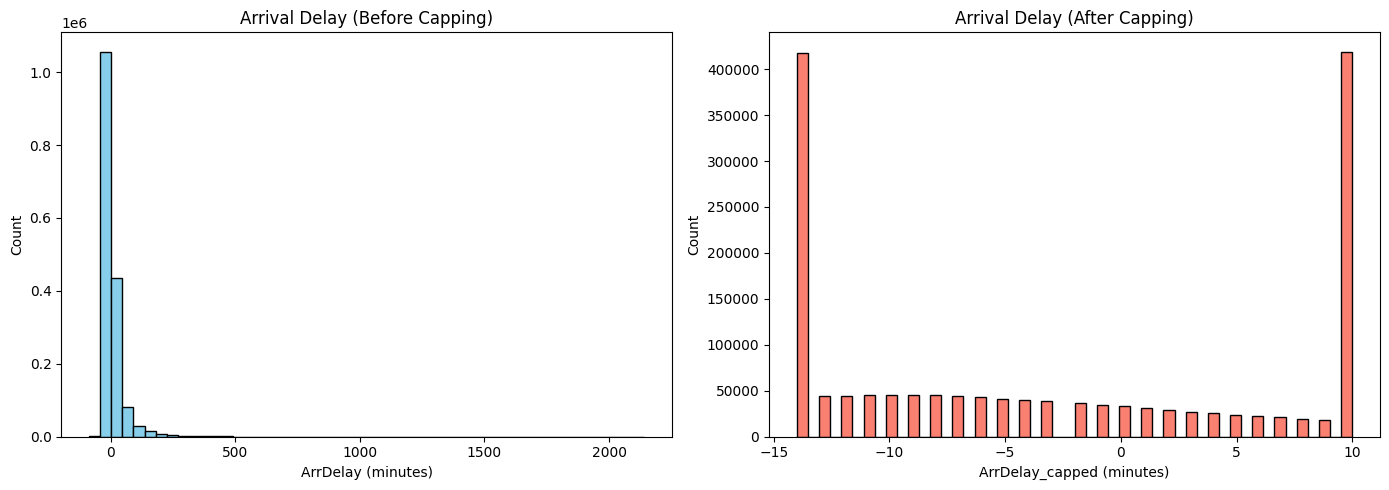

Capped ArrDelay below -14.0 and above 10.0.


In [ ]:

# Set capping thresholds
lower_cap = df['ArrDelay'].quantile(0.25)
upper_cap = df['ArrDelay'].quantile(0.75)

# Cap values
df['ArrDelay_capped'] = df['ArrDelay'].clip(lower=lower_cap, upper=upper_cap)

# Plot before and after distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before capping
axes[0].hist(df['ArrDelay'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_title('Arrival Delay (Before Capping)')
axes[0].set_xlabel('ArrDelay (minutes)')
axes[0].set_ylabel('Count')

# After capping
axes[1].hist(df['ArrDelay_capped'], bins=50, color='salmon', edgecolor='black')
axes[1].set_title('Arrival Delay (After Capping)')
axes[1].set_xlabel('ArrDelay_capped (minutes)')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Print cap summary
print(f"Capped ArrDelay below {lower_cap:.1f} and above {upper_cap:.1f}.")


## Interpretation
* Before Capping:
The original ArrDelay distribution is extremely right-skewed, with most flights having modest delays, but a long, thin tail of values stretching out past +1000 minutes. These rare outliers can dominate model training and bias statistical summaries, even though they happen infrequently.

* After Capping:
The ArrDelay_capped distribution is compressed at both ends (specifically, below -15 and above +15 minutes), removing extreme values while preserving the most common delays in the bulk of your data. The shape of your data is now much more manageable for statistical analysis and model training.

## Feature Selection: Drop Redundant Columns Before Modeling

 Columns we decided to drop:
 - Removed columns that directly leak target information (is_delay, ArrDelay) because they are computed from the delay itself and would artificially boost performance without reflecting real-world prediction ability.

* Dropped raw or overly granular calendar fields (FlightDate, CRSDepTime) since their effects are already captured by cleaner engineered features such as Month, Season, is_weekend, and DepHour_Bin.

* Eliminated columns with no variance after filtering (Cancelled, Diverted), because features that are always zero cannot help the model distinguish between delayed and on-time flights.

* Removed high-cardinality composite fields (Route, Airline_Route) that mainly duplicate information already present in Origin, Dest, and Reporting_Airline, preventing an unnecessary explosion in the number of one-hot encoded features.

* Dropped DepPeriod, which encodes the same time-of-day information as DepHour_Bin, to avoid redundant representations of the same concept.

* Overall, these drops reduce multicollinearity, simplify the feature space, and lower the risk of overfitting, helping tree-based models train faster and generalize better.

In [ ]:
# ============================================================
# Final Feature Cleanup Before Encoding and Modeling
# ============================================================

cols_to_drop_final = [
    'is_delay',
    'FlightDate',
    'CRSDepTime',
    'Cancelled',
    'Diverted',
    'ArrDelay',
    'Route',
    'Airline_Route',
    'DepPeriod',
    'OriginState',
    'DestState'
]

# Drop only columns that actually exist
cols_to_drop_final = [c for c in cols_to_drop_final if c in df.columns]
df = df.drop(columns=cols_to_drop_final)

print("Columns remaining after final cleanup:")
print(df.columns.tolist())


Columns remaining after final cleanup:
['Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'Distance', 'DepHour', 'is_weekend', 'Season', 'ArrDelay_capped', 'DepHour_Bin', 'is_heavy_delay']


In [ ]:
df.head()

,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,Dest,Distance,DepHour,is_weekend,Season,ArrDelay_capped,DepHour_Bin,is_heavy_delay
0,1,1,3,UA,LAX,ORD,1744.0,9,0,Winter,10.0,Morning,1
1,1,1,3,AA,IAH,DFW,224.0,17,0,Winter,2.0,Evening,0
2,1,1,3,AA,LAX,ORD,1744.0,12,0,Winter,10.0,Afternoon,0
3,1,1,3,AA,DFW,LAX,1235.0,19,0,Winter,10.0,Evening,1
4,1,1,3,AA,DFW,CLT,936.0,11,0,Winter,-13.0,Morning,0


# Model Building

## Encoding Categorical Features and Train/Test Split

In [ ]:
# 1. Define target
target_col = 'ArrDelay_capped'
y = df[target_col]

# 2. Feature matrix (drop target)
X = df.drop(columns=[target_col])

# 3. Categorical columns to one-hot encode
cat_cols = ['Reporting_Airline', 'Origin', 'OriginState',
            'Dest', 'DestState', 'Season', 'DepHour_Bin']

# Ensure they exist
cat_cols = [c for c in cat_cols if c in X.columns]

# 4. One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# 5. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, shuffle=True
)

print("Training shape:", X_train.shape)
print("Test shape:", X_test.shape)

Training shape: (1308472, 34)
Test shape: (327118, 34)


## Random Forest baseline

In [ ]:
# ===========================================
# Random Forest Regressor
# ===========================================

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    n_jobs=-1,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest - MAE:", mae_rf)
print("Random Forest - RMSE:", rmse_rf)
print("Random Forest - R²:", r2_rf)

Random Forest - MAE: 6.427601769515931
Random Forest - RMSE: 8.151926088548246
Random Forest - R²: 0.28968523576055794


## Random Forest – Business Interpretation
* The Random Forest model predicts arrival delay with an average error of about 6.4 minutes and a typical miss (RMSE) of about 8.2 minutes, which is accurate enough to support high‑level planning such as estimating average gate availability and staffing needs. From a business perspective, this allows airlines to flag flights that are likely to be moderately delayed and communicate more realistic arrival windows to passengers and ground crews.​

* However, the R² of about 0.29 shows that the model captures less than one‑third of the overall variability in delays, partly because the available dataset does not contain key drivers such as detailed weather, air‑traffic congestion, or runway/airport capacity information. As a result, many disruptions remain unpredictable, so the model should not be used for minute‑exact decisions (for example, tight connection guarantees) without additional buffers and complementary real‑time data sources.

## XGBoost

In [ ]:
# ===========================================
# XGBoost Regressor
# ===========================================

from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    objective='reg:squarederror'
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost - MAE:", mae_xgb)
print("XGBoost - RMSE:", rmse_xgb)
print("XGBoost - R²:", r2_xgb)


XGBoost - MAE: 6.581977712115883
XGBoost - RMSE: 8.017949022030663
XGBoost - R²: 0.3128414471300943


## XGBoost – Business Interpretation
* The XGBoost model achieves a similar average error (≈6.6 minutes) and RMSE (≈8.0 minutes), with a slightly higher R² of about 0.31, indicating a modest improvement in how much delay variability it explains. Operationally, this means XGBoost can provide slightly more reliable delay forecasts to support dynamic scheduling, proactive customer messaging, and prioritization of flights with higher predicted delay risk.​

 * Nonetheless, most variation in delays is still unexplained because the training data lacks weather variables, real‑time congestion indicators, and other operational constraints that strongly influence late arrivals. Therefore, the model is best positioned as a decision‑support tool for approximate arrival‑time ranges, while further improvements would require integrating richer external data sources and regularly retraining on up‑to‑date information.

# Model Comparision

* Both models achieve similar accuracy: Random Forest has Mean Absolute Error (MAE) around 6.4 minutes and XGBoost around 6.6 minutes, so typical prediction error is roughly the same for business users.​

* XGBoost achieves slightly better Root Mean Squared Error (RMSE ≈ 8.0 vs. 8.2 minutes) and higher R² (≈ 0.31 vs. 0.29), meaning it explains more variation and penalizes large errors more effectively; this makes it preferable as the main operational model.​

* Random Forest remains a strong, stable baseline that is easier to interpret and can be combined with XGBoost in an ensemble to reduce variance and improve robustness of predictions.​

* Given the missing weather and congestion variables in the dataset, even the better model cannot capture all drivers of delay, so both should be treated as decision‑support tools rather than exact arrival‑time predictors.

# Additional enhancement steps
Extend the current models by systematically tuning hyperparameters with cross‑validation (for example, grid or random search) to further reduce error and modestly improve R‑squared on top of the already satisfactory project results.​

Experiment with advanced ensemble techniques, such as stacked meta‑learners that combine Random Forest and XGBoost, to learn optimal weights for each model and extract additional performance from the existing feature set.​

Deploy the final model against real‑time flight delay APIs, using live predictions and feedback to validate performance in production‑like conditions and support continuous model monitoring and improvement.

(We aim to complete these before final presentation)

# Stacking ensemble with meta‑learner (Ridge)

Stacking uses cross‑validated predictions from Random Forest and XGBoost as input features for a regularized linear meta‑learner, which learns when to trust each base model more; this often yields a small but meaningful reduction in delay‑prediction error and a more robust model than any single learner or naive average.

In [ ]:
# ============================================
# Stacking Ensemble with Meta-Learner (Ridge)
# Business goal: learn how to optimally combine
# RF and XGBoost predictions to reduce MAE/RMSE.
# ============================================

from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1) Define base learners (already tuned / reasonable defaults)
estimators = [
    ("rf", rf),    # RandomForestRegressor instance
    ("xgb", xgb)   # XGBRegressor instance
]

# 2) Define meta-learner
# Ridge keeps the meta-model simple and regularized
meta_learner = Ridge(alpha=1.0, random_state=42)

stack_model = StackingRegressor(
    estimators=estimators,
    final_estimator=meta_learner,
    cv=5,              # use CV to generate out-of-fold meta-features
    n_jobs=-1,
    passthrough=False  # meta-learner uses only base model predictions
)

# 3) Fit stacked model on training data
stack_model.fit(X_train, y_train)

# 4) Evaluate on test data
y_pred_stack = stack_model.predict(X_test)

mae_stack = mean_absolute_error(y_test, y_pred_stack)
rmse_stack = np.sqrt(mean_squared_error(y_test, y_pred_stack))
r2_stack = r2_score(y_test, y_pred_stack)

print("Stacked Ensemble - MAE :", mae_stack)
print("Stacked Ensemble - RMSE:", rmse_stack)
print("Stacked Ensemble - R²  :", r2_stack)

# If MAE/RMSE improve over both RF and XGBoost,
# you can justify the stacked model as your final business model:
# it learns data-driven weights for each base learner instead
# of assuming a simple 50/50 average.


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGKILL(-9)}
Detailed tracebacks of the workers should have been printed to stderr in the executor process if faulthandler was not disabled.